# Módulo 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Adicione o caminho do seu arquivo aqui.
file = "/content/drive/My Drive/Colab Notebooks/USA_Housing.csv"
input_df = pd.read_csv(file)

In [4]:
input_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def dataCleaning(self):
    self.df.dropna()

    
  def selectColumns(self):
    self.X = self.df[['Avg. Area Income', 'Avg. Area House Age',\
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', \
                     'Area Population']].values
    self.y = self.df['Price'].values

  def selectColumnsDF(self):
    self.df['Avg. Area Income'] = np.log(self.df['Avg. Area Income'])
    self.df['Avg. Area House Age'] = np.log(self.df['Avg. Area House Age'])
    self.df['Avg. Area Number of Rooms']  = np.log(self.df['Avg. Area Number of Rooms'])
    self.df['Avg. Area Number of Bedrooms']  = np.log(self.df['Avg. Area Number of Bedrooms'])
    self.df['Area Population']  = np.log(self.df['Area Population'])
    self.df = self.df[['Avg. Area Income', 'Avg. Area House Age',\
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', \
                     'Area Population','Price']].values
  

  def selectColumn(self):
    self.X = self.df['Avg. Area Income'].values
    self.y = self.df['Price'].values
    
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
  

In [7]:
pipeline = MachineLearningPipeline(input_df)
pipeline.dataCleaning()
pipeline.selectColumn()
pipeline.trainTestSplit()

# Regressão multivariável

In [8]:
pipeline_m = MachineLearningPipeline(input_df)
pipeline_m.dataCleaning()
pipeline_m.selectColumns()

pipeline_m.X = np.log(pipeline_m.X)
pipeline.y = np.log(pipeline.y)

In [9]:
def funcao_custo_multi(theta, X, y):
  m = len(X)
  elem = list(range(1,m))
  n = pipeline_m.X.shape[1]
  J=0
  for j in range(1,n):
    J += (1/2*m) * sum([(theta[0] + theta[j+1]*X[i,j]) - y[i] for i in elem]) ** 2
  return J

In [10]:
def hypothesis(theta_n, X):
    sum = 0

    for i in range(1,len(theta_n)):
      sum += theta_n[i] * X[:,i-1]
    return theta_n[0] + sum

In [11]:
def gradient_descent_multi(X, y, alpha, num_iteracoes):

  m = len(y)
  n = pipeline_m.X.shape[1]
  # print(n)
  theta_n = np.zeros(n+1)
  errors = []
  for i in range(0,num_iteracoes):
    
    h_theta = hypothesis(theta_n, X)
    # print(h_theta)

    theta_n[0] -= alpha*(sum(h_theta-y))/m
    for j in range(0, n):
      theta_n[j+1] -= alpha * (np.sum((h_theta - y) * X[:,j])/m)
    errors.append(funcao_custo_multi(theta_n, X, y))
  return theta_n, errors

In [12]:
result = gradient_descent_multi(pipeline_m.X, pipeline_m.y, 0.001, 100)

In [13]:
result[0]

array([ 4725.37953757, 56025.67565562, 11086.95098983, 10839.24654699,
        8118.42234296, 53231.60908963])

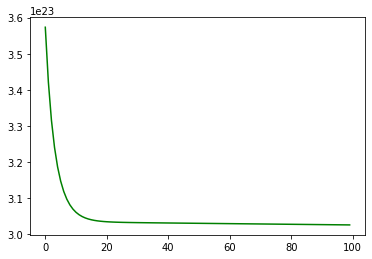

In [14]:
plt.plot(result[1], color = "g")

In [15]:
result = gradient_descent_multi(pipeline_m.X, pipeline_m.y, 0.0001, 50)

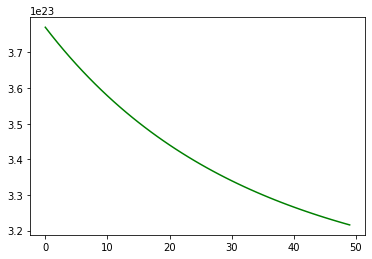

In [16]:
plt.plot(result[1], color = "g")

# Regressão logística

In [17]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
file = "/content/drive/My Drive/Colab Notebooks/USA_Housing.csv"
input_df = pd.read_csv(file)
input_df = input_df.drop(['Address'], axis=1)
cut_value = input_df['Price'].describe()[6]
input_df['Price'] = [0 if x < cut_value else 1 for x in input_df['Price']]

In [19]:
pipeline_m = MachineLearningPipeline(input_df)
pipeline_m.dataCleaning()
pipeline_m.selectColumnsDF()

In [20]:
pipeline_m.df

array([[11.28408394,  1.73745486,  1.94722188,  1.40854497, 10.04701633,
         0.        ],
       [11.28034556,  1.79224265,  1.90669713,  1.12817109, 10.6009522 ,
         1.        ],
       [11.02332412,  1.76915419,  2.14156239,  1.63510566, 10.51548323,
         0.        ],
       ...,
       [11.05707224,  1.98108293,  1.5696739 ,  0.75612198, 10.41229551,
         0.        ],
       [11.12728256,  1.71098107,  1.96433141,  1.69377906, 10.66021076,
         0.        ],
       [11.08996696,  1.7904762 ,  1.91579493,  1.403643  , 10.7472352 ,
         0.        ]])

In [21]:
from math import exp
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

In [22]:
def gradient_descent_logistic(train, l_rate, n_epoch):
  coef = [0.0 for i in range(len(train[0]))]
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      yhat = predict(row, coef)
      error = row[-1] - yhat
      sum_error += error**2
      coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
      for i in range(len(row)-1):
        coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return coef

In [23]:
x=gradient_descent_logistic(pipeline_m.df, 0.01, 1000)

>epoch=0, lrate=0.010, error=979.413
>epoch=1, lrate=0.010, error=971.243
>epoch=2, lrate=0.010, error=964.365
>epoch=3, lrate=0.010, error=958.418
>epoch=4, lrate=0.010, error=953.238
>epoch=5, lrate=0.010, error=948.692
>epoch=6, lrate=0.010, error=944.672
>epoch=7, lrate=0.010, error=941.091
>epoch=8, lrate=0.010, error=937.881
>epoch=9, lrate=0.010, error=934.986
>epoch=10, lrate=0.010, error=932.362
>epoch=11, lrate=0.010, error=929.972
>epoch=12, lrate=0.010, error=927.788
>epoch=13, lrate=0.010, error=925.784
>epoch=14, lrate=0.010, error=923.939
>epoch=15, lrate=0.010, error=922.238
>epoch=16, lrate=0.010, error=920.663
>epoch=17, lrate=0.010, error=919.203
>epoch=18, lrate=0.010, error=917.847
>epoch=19, lrate=0.010, error=916.585
>epoch=20, lrate=0.010, error=915.407
>epoch=21, lrate=0.010, error=914.308
>epoch=22, lrate=0.010, error=913.279
>epoch=23, lrate=0.010, error=912.315
>epoch=24, lrate=0.010, error=911.410
>epoch=25, lrate=0.010, error=910.559
>epoch=26, lrate=0.010